### 95. Unique Binary Search Trees II

#### Content
<p>Given an integer <code>n</code>, return <em>all the structurally unique <strong>BST&#39;</strong>s (binary search trees), which has exactly </em><code>n</code><em> nodes of unique values from</em> <code>1</code> <em>to</em> <code>n</code>. Return the answer in <strong>any order</strong>.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>
<img alt="" src="https://assets.leetcode.com/uploads/2021/01/18/uniquebstn3.jpg" style="width: 600px; height: 148px;" />
<pre>
<strong>Input:</strong> n = 3
<strong>Output:</strong> [[1,null,2,null,3],[1,null,3,2],[2,1,3],[3,1,null,null,2],[3,2,null,1]]
</pre>

<p><strong>Example 2:</strong></p>

<pre>
<strong>Input:</strong> n = 1
<strong>Output:</strong> [[1]]
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>1 &lt;= n &lt;= 8</code></li>
</ul>


#### Difficulty: Medium, AC rate: 48.7%

#### Question Tags:
- Dynamic Programming
- Backtracking
- Tree
- Binary Search Tree
- Binary Tree

#### Links:
 🎁 [Question Detail](https://leetcode.com/problems/unique-binary-search-trees-ii/description/) | 🎉 [Question Solution](https://leetcode.com/problems/unique-binary-search-trees-ii/solution/) | 💬 [Question Discussion](https://leetcode.com/problems/unique-binary-search-trees-ii/discuss/?orderBy=most_votes)

#### Hints:


#### Sample Test Case
3

---
What's your idea?

根节点占一个节点，左右子树分别分配节点数，组合构造出所有结构

然后按中序遍历的方式从1开始填充 `val`

---

In [39]:
from typing import List, Optional
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def generateTrees(self, n: int) -> List[Optional[TreeNode]]:
        memory = dict()
        trees = self.recur(n, memory)
        r = []
        for t in trees:
            next_val = [1]
            r.append(self.fill_tree(t, next_val))
        return r
    
    def recur(self, n, memory):
        if n in memory:
            return memory[n]
        if n == 0:
            return [None]
        r = []
        for i in range(n):
            for left_tree in self.generateTrees(i):
                for right_tree in self.generateTrees(n-1-i):
                    r.append(TreeNode(left=self.copy_tree(left_tree), right=self.copy_tree(right_tree)))
        memory[n] = r
        return r
    
    def copy_tree(self, root):
        if root is None:
            return None
        return TreeNode(left=self.copy_tree(root.left), right=self.copy_tree(root.right))
    
    def fill_tree(self, root, next_val):
        if root is None:
            return None
        root.left = self.fill_tree(root.left, next_val)
        root.val = next_val[0]
        next_val[0] = next_val[0] + 1
        root.right = self.fill_tree(root.right, next_val)
        return root

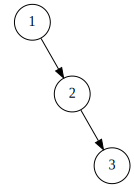

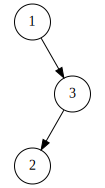

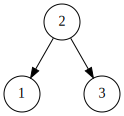

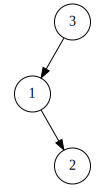

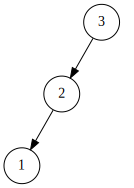

In [40]:
from visualizer import visualize_binary_tree
s = Solution()

for t in s.generateTrees(3):
  visualize_binary_tree(t)

In [41]:
import sys, os; sys.path.append(os.path.abspath('..'))
from submitter import submit
submit(95)

😃 Result: Accepted

📥 Input: ``

📤 Output: ``

✅ Expected: ``

💯 Passed Test Case: 8 / 8

🚀 Runtime: 211 ms, Memory: 16.9 MB

🉑 Runtime Percentile: better than 5.12%, Memory Percentile: better than 8.49%

📆 Finished At: 2022-02-17